     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


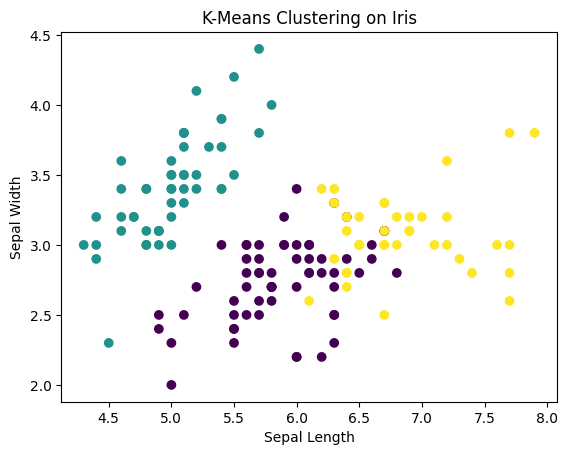

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load data
df = pd.read_csv('iris.csv')
print(df)
X = df.drop('class', axis=1)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Add cluster labels to data
df['cluster'] = kmeans.labels_

# Plot (using first two features)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering on Iris')
plt.show()


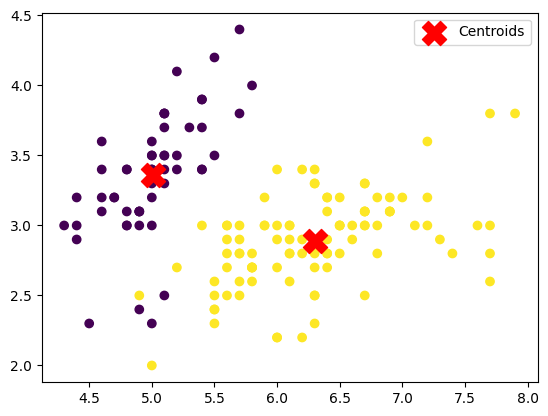

152.36870647733906


In [22]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df=pd.read_csv('iris.csv')
x=df.drop('class',axis=1)

model=KMeans(n_clusters=2)
model.fit(x)

df['KMeans_class']=model.labels_


centers = model.cluster_centers_
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=model.labels_, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red',s=300, marker='X', label='Centroids')
plt.legend()
plt.show()
print(model.inertia_)


In [ ]:
# Encode class labels to numbers
le = LabelEncoder()
true_labels = le.fit_transform(df['class'])

# Check clustering accuracy
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Match predicted clusters to true labels
labels = np.zeros_like(kmeans.labels_)
for i in range(3):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(true_labels[mask], keepdims=True).mode[0]

print("Clustering accuracy (approx):", accuracy_score(true_labels, labels))


Clustering accuracy (approx): 0.8866666666666667


In [ ]:
# Display the first few rows to verify the data
print(df.head())


   sepal length  sepal width  petal length  petal width        class  cluster
0           5.1          3.5           1.4          0.2  Iris-setosa        1
1           4.9          3.0           1.4          0.2  Iris-setosa        1
2           4.7          3.2           1.3          0.2  Iris-setosa        1
3           4.6          3.1           1.5          0.2  Iris-setosa        1
4           5.0          3.6           1.4          0.2  Iris-setosa        1


In [ ]:
# Check for missing values in the dataset
print("Missing values check:")
print(df.isnull().sum())


Missing values check:
sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
cluster         0
dtype: int64


In [23]:
# Check for duplicates in the dataset
print("Checking for duplicates:")
print(df.duplicated().sum())


Checking for duplicates:
3


In [ ]:
# Summarize the statistical details of the dataset
print("Dataset Summary:")
print(df.describe())


Dataset Summary:
       sepal length  sepal width  petal length  petal width     cluster
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    0.853333
std        0.828066     0.433594      1.764420     0.763161    0.805907
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [ ]:
# Show the data types of each column
print("Data Types of Columns:")
print(df.dtypes)


Data Types of Columns:
sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
cluster           int32
dtype: object
